# Tasks for laboratory assignment 1

In [3]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [2]:
import re

def remove_repetition_of_whitespaces(text: str) -> str:
    return re.sub(r"\s\s+", lambda s: s.string[s.start()], text)

print(remove_repetition_of_whitespaces("Test    \n\ntest\n\t\t test\t\n\n test"))

def remove_repetition_of_whitespaces_decorator(callback: callable):
    def result(*args, **kwargs):
        return remove_repetition_of_whitespaces(callback(*args, **kwargs))
    
    return result

Test test
test	test


In [3]:
@remove_repetition_of_whitespaces_decorator
def parse_web_page(url):
    """
    Fetch the content of the given web page.

    Args:
        url (str): The URL of the web page to fetch.

    Returns:
        str: The content of the page as a string.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    print(f"url: {url}")
    response = requests.get(url)
    print(f"status code: {response.status_code}")
    response.raise_for_status()
    return BeautifulSoup(response.text).text

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

url: https://fmi.chnu.edu.ua/
status code: 200

Головна - Факультет математики та інформатики
Перейти до основного вмісту
[email protected]
Новини Україна, м. Чернівці, вул. Університетська, 28
Всі
Загальні
Оголошення
Події
Студенту
Викладачу
Вітання
Діяльність
Наукова
Навчально-методична
Міжна
url: https://en.wikipedia.org/wiki/Web_scraping
status code: 200

Web scraping - Wikipedia
Jump to content
Main menu
Main menu
move to sidebar
hide
Navigation
Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate
Contribute
HelpLearn to editCommunity portalRecent changesUpload file
Search
Search



## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [4]:
def parse_api(api_url):
    """
    Fetch the data of the given API endpoint and save it to result.json.

    Args:
        api_url (str): The URL of the API endpoint.

    Returns:
        None.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    print(f"api_url: {api_url}")
    response = requests.get(api_url)
    print(f"status code: {response.status_code}")
    response.raise_for_status()

    try:
        response_json = response.json()
    except Exception as error:
        print("An error occurred during the call response.json().\n"
              f"  Error: {type(error)}\n"
              f"  Error message: {error}\n")
        return None
    
    print(f"response.json(): {response_json}")
    
    with open("result.json", "w", encoding="utf-8") as file:
        json.dump(response_json, file)

    return None

parse_api('https://api.github.com/')
parse_api('https://fmi.chnu.edu.ua/')

api_url: https://api.github.com/
status code: 200
response.json(): {'current_user_url': 'https://api.github.com/user', 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}', 'authorizations_url': 'https://api.github.com/authorizations', 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}', 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}', 'emails_url': 'https://api.github.com/user/emails', 'emojis_url': 'https://api.github.com/emojis', 'events_url': 'https://api.github.com/events', 'feeds_url': 'https://api.github.com/feeds', 'followers_url': 'https://api.github.com/user/followers', 'following_url': 'https://api.github.com/user/following{/target}', 'gists_url': 'https://api.github.com/gists{/gist_id}', 'hub_url': 'https://api.github.com/hub', 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}', 'issues_

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [5]:
def are_dates_same(date1: str, date2: str) -> bool:
    if date1 == date2:
        return True

    return datetime.strptime(date1, "%Y-%m-%d") == datetime.strptime(date2, "%Y-%m-%d")

def parse_json(date):
    """
    Parse the data from weather.json file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    weather_json_path = './resources/weather.json'
    with open(weather_json_path, 'r', encoding="utf-8") as file:
        data = json.load(file)
    
    result = []
    try:
        daily_weather = data['daily']
        for day_info in daily_weather:
            if are_dates_same(day_info['date'], date):
                result.append(day_info)
    except Exception as error:
        print("An error occurred during parsing\n"
              f"  Error: {type(error)}\n"
              f"  Error message: {error}\n")
    
    return result
    
target_date = '2024-8-19'
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [6]:
def parse_csv(date):
    """
    Parse the data from weather.csv file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    weather_csv_path = './resources/weather.csv'
    data_frame = pd.read_csv(weather_csv_path)
    return data_frame[data_frame['CET'] == date].to_dict('records')
    
target_date = '1997-5-22'
print(parse_csv(target_date))

[{'CET': '1997-5-22', 'Max TemperatureC': 25.0, 'Mean TemperatureC': 18.0, 'Min TemperatureC': 10.0, 'Dew PointC': 11.0, 'MeanDew PointC': 8.0, 'Min DewpointC': 6.0, 'Max Humidity': 88.0, ' Mean Humidity': 54.0, ' Min Humidity': 34.0, ' Max Sea Level PressurehPa': 1017, ' Mean Sea Level PressurehPa': 1015, ' Min Sea Level PressurehPa': 1012, ' Max VisibilityKm': 10.0, ' Mean VisibilityKm': 10.0, ' Min VisibilitykM': 10.0, ' Max Wind SpeedKm/h': 11, ' Mean Wind SpeedKm/h': 3, ' Max Gust SpeedKm/h': nan, 'Precipitationmm': 0.0, ' CloudCover': 3.0, ' Events': nan, 'WindDirDegrees': 277}]


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

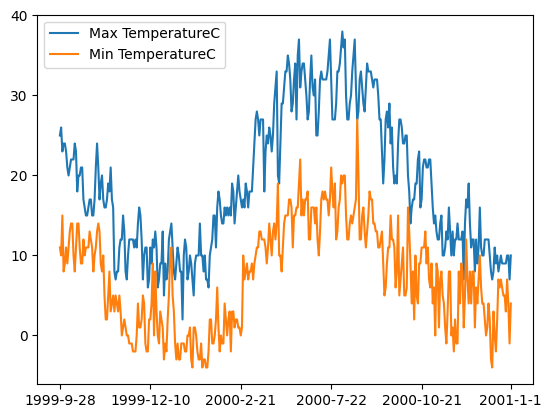

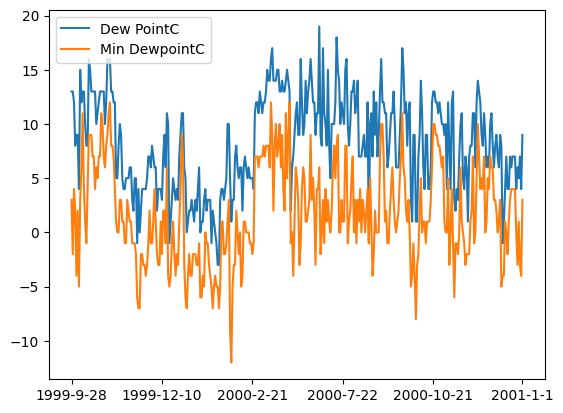

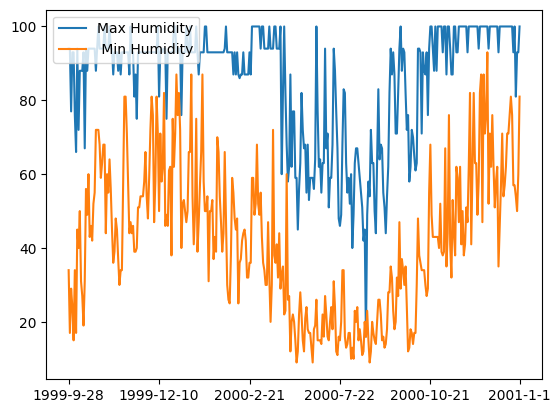

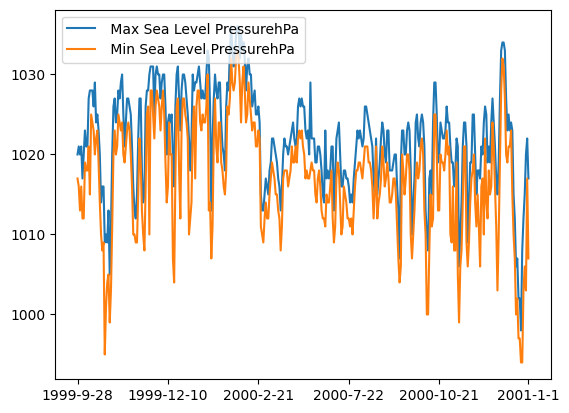

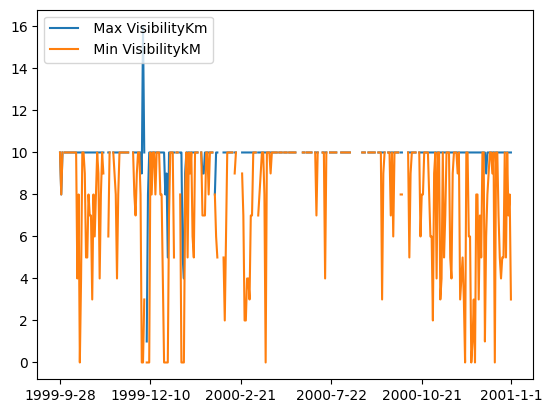

In [43]:
import os

def visualize_data():
    """
    Parse the data from weather.csv file and visualize it using Matplotlib. Use more then one visualization. 
    Save the results in the repository.

    Args:
        None: None.

    Returns:
        None: None.
    """
    weather_csv_path = './resources/weather.csv'
    data_frame = pd.read_csv(weather_csv_path)

    save_to_dir = './visualize_data/'
    os.makedirs(save_to_dir, exist_ok=True)
    
    start = 1000
    size = 365
    end = start + size

    figure_names = ['TemperatureC', 'Dew PointC', 'Humidity', 'Sea Level PressurehPa', 'VisibilityKm']
    for i, name in enumerate(figure_names):
        plt.figure()
        i = 1 + 3 * i
        plt.plot(
            data_frame['CET'][start:end], 
            data_frame.values[start:end, i:i+3:2], 
            label=data_frame.columns[i:i+3:2]
        )
        plt.legend(loc="upper left")
        xticks = data_frame['CET'][start:end:int(size * 0.2)].to_list()
        xticks.append(data_frame['CET'][end - 1])
        plt.gca().set_xticks(xticks)
        plt.savefig(save_to_dir + name + '.jpg')

    return None

visualize_data()